In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
file_path = '/content/sample_data/IMDb Movies India.csv'

# Using 'latin1' encoding
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("File loaded successfully with 'latin1' encoding!")
except UnicodeDecodeError:
    print("Failed to load file with 'latin1' encoding. Trying 'ISO-8859-1'...")
    # Fallback to another encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
df

File loaded successfully with 'latin1' encoding!


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df["Year"]=df["Year"].fillna(df["Year"].mode()[0])

In [ ]:
df["Duration"]=df["Duration"].fillna(df["Duration"].mode()[0])

In [ ]:
df["Genre"]=df["Genre"].fillna(df["Genre"].mode()[0])

In [ ]:
df["Rating"]=df["Rating"].fillna(df["Rating"].mean())

In [ ]:
df["Votes"]=df["Votes"].fillna(df["Votes"].mode()[0])

In [ ]:
df["Director"]=df["Director"].fillna(df["Director"].mode()[0])

In [ ]:
df["Actor 1"]=df["Actor 1"].fillna(df["Actor 1"].mode()[0])

In [ ]:
df["Actor 2"]=df["Actor 2"].fillna(df["Actor 2"].mode()[0])

In [ ]:
df["Actor 3"]=df["Actor 3"].fillna(df["Actor 3"].mode()[0])

In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Duration  15509 non-null  object 
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  object 
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),120 min,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),120 min,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),120 min,Action,5.841621,8,Kiran Thej,Sangeeta Tiwari,Rekha,Pran
15507,Zulmi Shikari,(1988),120 min,Action,5.841621,8,Jayant Desai,Ashok Kumar,Rekha,Pran
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.200000,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.describe()

,Rating
count,15509.000000
mean,5.841621
std,0.987343
min,1.100000
25%,5.841621
50%,5.841621
75%,6.000000
max,10.000000


<Axes: xlabel='Year', ylabel='count'>

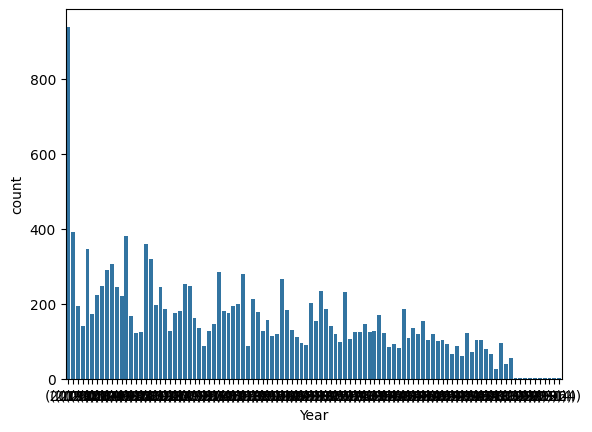

In [ ]:
# EDA
sns.countplot(data=df,x="Year")

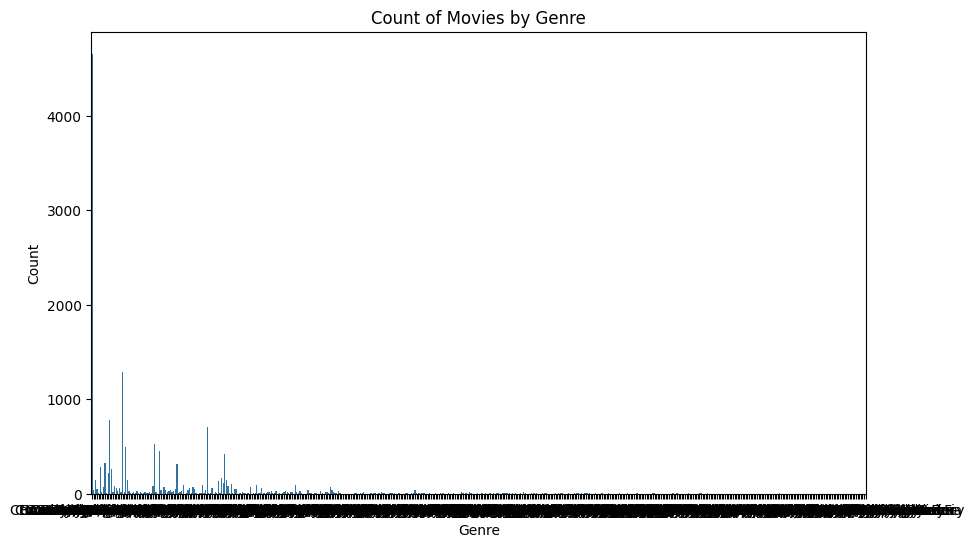

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Genre")
plt.title("Count of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Director', ylabel='count'>

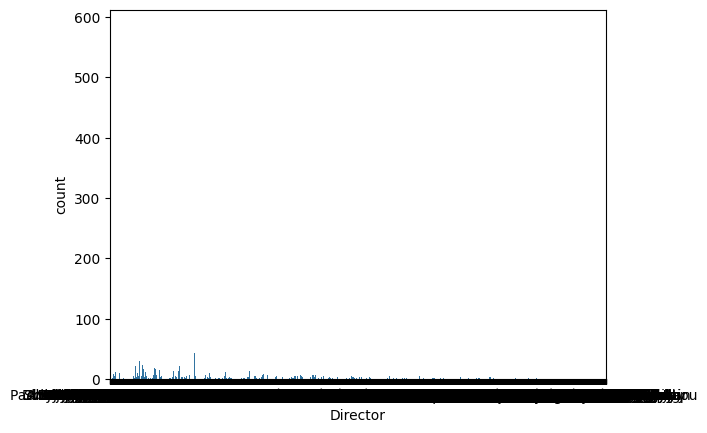

In [ ]:
sns.countplot(data=df,x="Director")

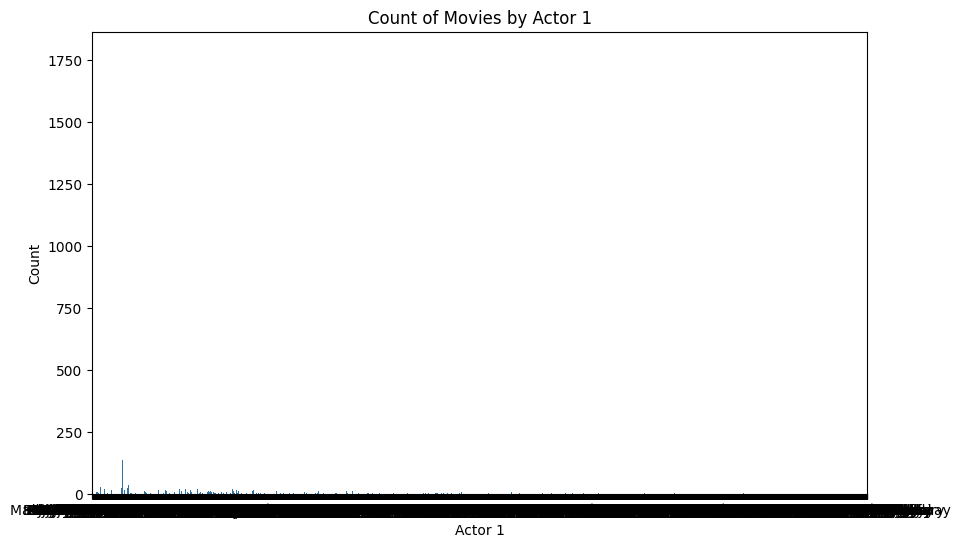

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Actor 1")
plt.title("Count of Movies by Actor 1")
plt.xlabel("Actor 1")
plt.ylabel("Count")
plt.show()

In [ ]:
import plotly.express as px
# Example 1: Bar Plot - Count of movies by Genre
fig_bar = px.bar(
    df,
    x='Genre',
    title='Count of Movies by Genre',
    color='Genre',
    labels={'Genre': 'Movie Genre'},
    height=400
)
fig_bar.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig_bar.show()

In [ ]:
# Convert 'Votes' column to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [ ]:
# Drop rows with missing or NaN values in 'Votes' or 'Rating'
df = df.dropna(subset=['Votes', 'Rating'])

In [ ]:
# Scatter Plot - Rating vs Votes
fig_scatter = px.scatter(
    df,
    x='Votes',
    y='Rating',
    color='Genre',
    size='Votes',
    title='Movie Ratings vs Votes',
    labels={'Votes': 'Number of Votes', 'Rating': 'IMDb Rating'},
    height=400
)
fig_scatter.update_layout(xaxis_title='Votes', yaxis_title='Rating')
fig_scatter.show()

In [ ]:
# 1. Distribution of Ratings
fig_rating_dist = px.histogram(
    df,
    x='Rating',
    nbins=20,
    title='Distribution of IMDb Ratings',
    labels={'Rating': 'IMDb Rating'},
    height=400
)
fig_rating_dist.show()

In [ ]:
# 3. Average Rating by Genre
avg_rating_genre = df.groupby('Genre')['Rating'].mean().reset_index()
fig_avg_rating_genre = px.bar(
    avg_rating_genre,
    x='Genre',
    y='Rating',
    title='Average Rating by Genre',
    labels={'Genre': 'Movie Genre', 'Rating': 'Average Rating'},
    height=400
)
fig_avg_rating_genre.show()

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")+0000
    33333333333333333333333333333333
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print()

Model: Linear Regression
  Mean Squared Error: 0.8776
  R2 Score: -0.0013

Model: KNN Regressor
  Mean Squared Error: 1.0157
  R2 Score: -0.1589

Model: Decision Tree
  Mean Squared Error: 1.0165
  R2 Score: -0.1598

Model: Random Forest
  Mean Squared Error: 0.9629
  R2 Score: -0.0987

Model: Gradient Boosting
  Mean Squared Error: 0.8687
  R2 Score: 0.0088

Model: XGBoost
  Mean Squared Error: 0.8761
  R2 Score: 0.0004



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best R2 Score: -0.0050412769216446884


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Votes']]  # Add more features if available
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.8775654918875754
R2 Score: -0.0012740993266322498


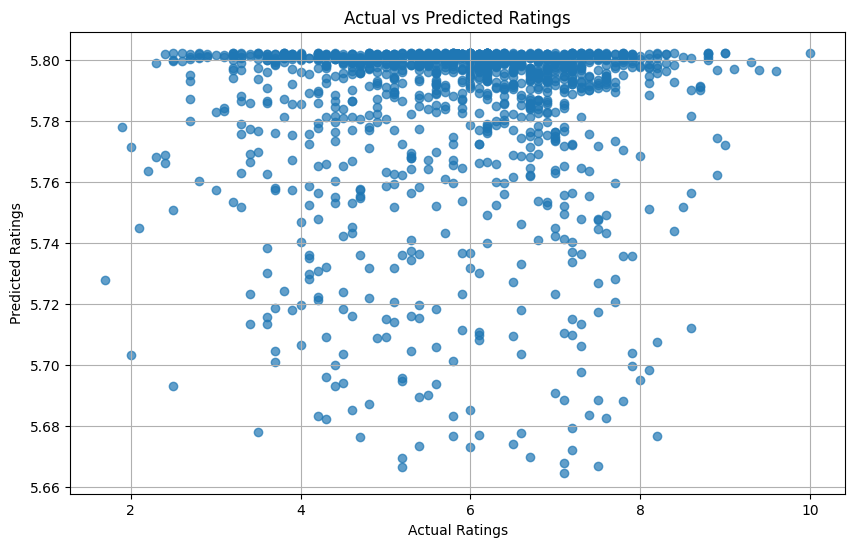

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid()
plt.show()